# Regresion Logística

## Noelia Otazo Rojo

### Importamos las librerías necesarias

In [27]:
# Comando para la instalación de las librerías necesarias
#!pip install matplotlib keras tensorflow scikit-learn seaborn pandas plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importamos la libreria de sklearn para realizar el split de los datos.
from sklearn.model_selection import train_test_split
# Librería para realizar la regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


### Carga del dataset y transformación de datos

In [28]:
# Cargar el dataset de emergencias del 112 en CYL
data = pd.read_csv(".\dataset\Accidentes.csv", encoding="cp1252", sep=";")

# Antes de nada borramos los valores nulos
data_clean=data.dropna()

# Visualizar los primeros registros
# data.head()

# Separamos los datos en entrenamiento y prueba.
data_train, data_test = train_test_split(data_clean, test_size=0.2, stratify=data_clean['Tipo Accidente'])

# Muestrar los valores que puede tomar la columna
# data['Tipo de vehículo'].unique()

# Verificar si hay algún valor NaN en todo el DataFrame
# has_nan = data_train.isna().any().any()

# Mostrar el resultado
# print(has_nan)

In [29]:
#Transforma los datos a numéricos
#Tipo Accidente
map_target_class = {'Atropello a peatón': 0, 'Colisión lateral y frontolateral': 1, 'Colisión por alcance y múltiple': 2, 'Otro tipo de accidente': 3, 'Salida de la vía': 4, 'Colisión frontal': 5, 'Colisión lateral': 6, 'Vuelco en la calzada': 7}
data_train['TipoAccidente_Numérico'] = data_train['Tipo Accidente'].map(map_target_class)
data_test['TipoAccidente_Numérico'] = data_test['Tipo Accidente'].map(map_target_class)

#Sexo
map_target_sexo = {'Mujer': 0, 'Hombre': 1}
data_train['Sexo_Numérico'] = data_train['Sexo'].map(map_target_sexo)
data_test['Sexo_Numérico'] = data_test['Sexo'].map(map_target_sexo)

#Accesorios de seguridad
map_target_accesorios = {'NINGUNO': 0, 'SE DESCONOCE': 1, 'UTILIZANDO CINTURÓN ': 3, 'SISTEMA DE RETENCIÓN': 4, 'UTILIZANDO CASCO': 5, 'CON REFLECTANTES': 6}
data_train['Accesorios_Numérico'] = data_train['Accesorios de seguridad'].map(map_target_accesorios)
data_test['Accesorios_Numérico'] = data_test['Accesorios de seguridad'].map(map_target_accesorios)

#Tipo de vehículo
map_target_tipo_vehiculo = {'Ambulancia': 0, 'Autobús': 1, 'Bicicleta o triciclo sin motor': 2, 'Camión MMA <= 3500 Kg': 3, 'Camión MMA > 3500 Kg': 4, 'Ciclomotor': 5, 'Desconocido': 6, 'Furgoneta': 7, 'Motocicleta': 8, 'Otros Vehículos': 9, 'Otros vehículos ligeros': 10, 'Turismo': 11, 'Vehículo articulado': 12}
data_train['Vehículo_Numérico'] = data_train['Tipo de vehículo'].map(map_target_tipo_vehiculo)
data_test['Vehículo_Numérico'] = data_test['Tipo de vehículo'].map(map_target_tipo_vehiculo)


data_train.head(2)

,Tipo de vehículo,Accesorios de seguridad,Tipo Accidente,Sexo,Edad,Muertos,Graves,Leves,Accidentes,Victimas,TipoAccidente_Numérico,Sexo_Numérico,Accesorios_Numérico,Vehículo_Numérico
1962,Desconocido,CON REFLECTANTES,Salida de la vía,Mujer,3.0,0,1,0,1,1,4,0.0,6,6
3208,Otros Vehículos,NINGUNO,Colisión lateral y frontolateral,Mujer,3.0,0,0,14,17,14,1,0.0,0,9


In [30]:
data_train.dropna()
data_test.dropna()

X_train = data_train.drop(['Tipo Accidente', 'Sexo', 'Accesorios de seguridad', 'Tipo de vehículo', 'TipoAccidente_Numérico'], axis=1)
y_train = data_train['TipoAccidente_Numérico']
X_test  = data_test.drop(['Tipo Accidente', 'Sexo', 'Accesorios de seguridad', 'Tipo de vehículo', 'TipoAccidente_Numérico'], axis=1)
y_test  = data_test['TipoAccidente_Numérico']

In [31]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
# Aplica dropna() mientras X_train y X_test son todavía DataFrames de pandas
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ahora, alinea y_train y y_test con los índices de X_train y X_test después de dropna()
y_train = data_train['TipoAccidente_Numérico'].loc[X_train.index]
y_test = data_test['TipoAccidente_Numérico'].loc[X_test.index]

print(X_train.shape[0] == y_train.shape[0])  # Debería ser True
print(X_test.shape[0] == y_test.shape[0])  # Debería ser True

True
True


### Creación y entenamineto del modelo

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [34]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

### Resultado de entrenamiento

In [35]:
preds_train = lr.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[ 28 161  69  60  26   3  25]
 [ 10 273  99  68  36   0  35]
 [  8 219 121  58  47   1  34]
 [  7 192  71  79  66   2  35]
 [  8 174  43  47 141  10  39]
 [ 11 147  34  60  82   7  21]
 [  4 133  46  81  36   0  32]]
              precision    recall  f1-score   support

           0       0.37      0.08      0.12       372
           1       0.21      0.52      0.30       521
           2       0.25      0.25      0.25       488
           3       0.17      0.17      0.17       452
           4       0.32      0.31      0.31       462
           5       0.30      0.02      0.04       362
           7       0.14      0.10      0.12       332

    accuracy                           0.23      2989
   macro avg       0.25      0.21      0.19      2989
weighted avg       0.25      0.23      0.20      2989



In [36]:
# Realizar predicciones en el conjunto de prueba
preds_test = lr.predict(X_test)

# Calcular la matriz de confusión para el conjunto de prueba
print(confusion_matrix(y_test, preds_test))

# Imprimir el informe de clasificación para el conjunto de prueba
print(classification_report(y_test, preds_test))

[[ 8 43 16 14  7  1  4]
 [ 5 59 26 19  8  0 10]
 [ 2 51 33 19 13  0  7]
 [ 2 46 22 21 10  0  9]
 [ 1 44 16  9 33  1 15]
 [ 6 34  7  9 20  2 12]
 [ 0 29 11 26 14  0  5]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        93
           1       0.19      0.46      0.27       127
           2       0.25      0.26      0.26       125
           3       0.18      0.19      0.19       110
           4       0.31      0.28      0.29       119
           5       0.50      0.02      0.04        90
           7       0.08      0.06      0.07        85

    accuracy                           0.21       749
   macro avg       0.26      0.19      0.18       749
weighted avg       0.26      0.21      0.19       749



### Matriz de confusión

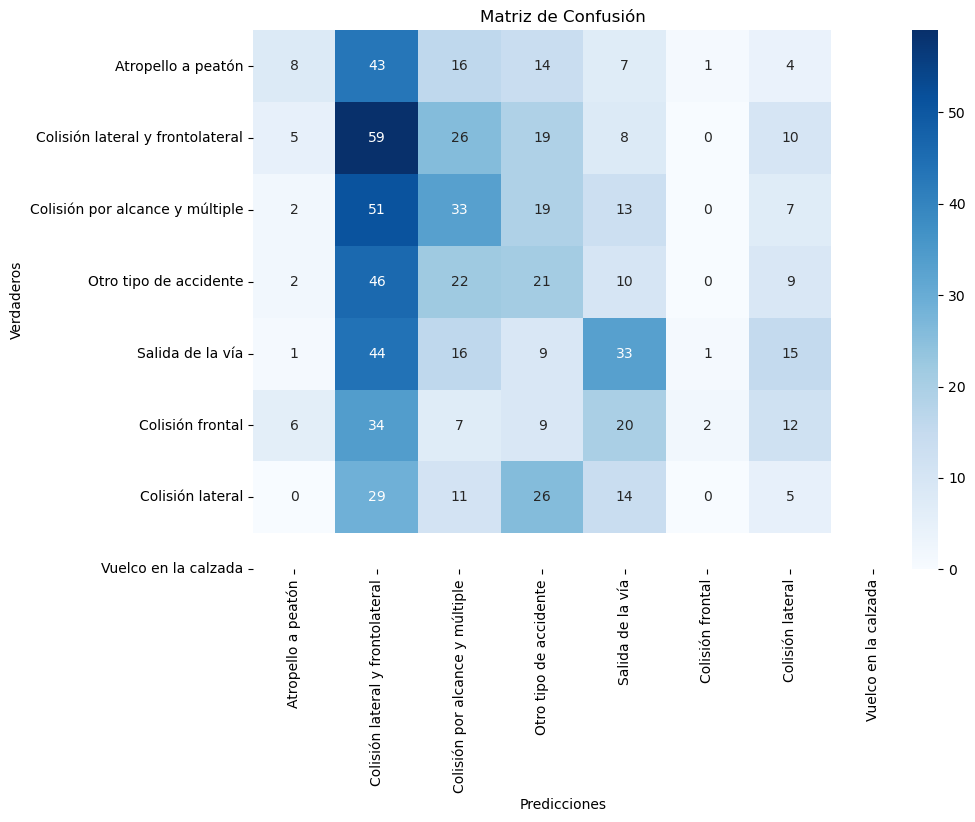

In [37]:
cm = confusion_matrix(y_test, preds_test)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=map_target_class.keys(), yticklabels=map_target_class.keys())
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

### Intento de predicción

In [39]:
# El resultado tiene que ser 3
X_new = np.array([[6,0,0,1,1,1,0,1,9]])
y_proba = lr.predict(X_new)

# Hacer predicciones de clase y probabilidades
print("Predicciones de clase para datos nuevos:\n", X_new)
print("\nProbabilidades de pertenencia a cada clase para datos nuevos:\n", y_proba)

Predicciones de clase para datos nuevos:
 [[6 0 0 1 1 1 0 1 9]]

Probabilidades de pertenencia a cada clase para datos nuevos:
 [2]
